In [7]:
%pip install qiskit 
%pip install qiskit-aer 
%pip install pylatexenc 
%pip install qiskit-ibm-runtime 
%pip install qiskit-ibm-provider 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Implementing Grover's algorithm for the case of 2 qubits with the winning state of |w⟩=|11⟩

In [8]:
#initialization
#import matplotlib.pyplot as plt
#import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
#from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [9]:
# set the length of the n-bit input string.
n = 2

## Create the circuit and initalize the qubits

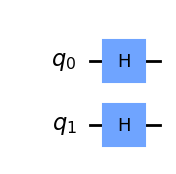

In [10]:
grover_circuit = QuantumCircuit(n)

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw(output='mpl', style="clifford")

## Apply the Oracle (phase inversion) for |w⟩=|11⟩ (Controlled-Z gate in this case)

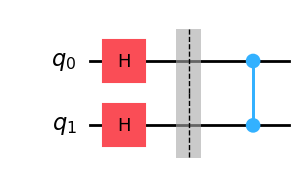

In [11]:
grover_circuit.barrier()
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw(output='mpl')

## Apply the diffuser (inversion about the mean)

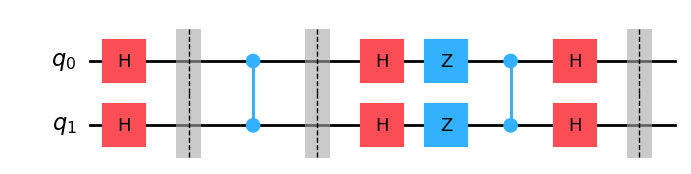

In [12]:
# Diffusion operator (U_s)
grover_circuit.barrier()
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.barrier()

grover_circuit.draw(output='mpl')

## Apply measurement

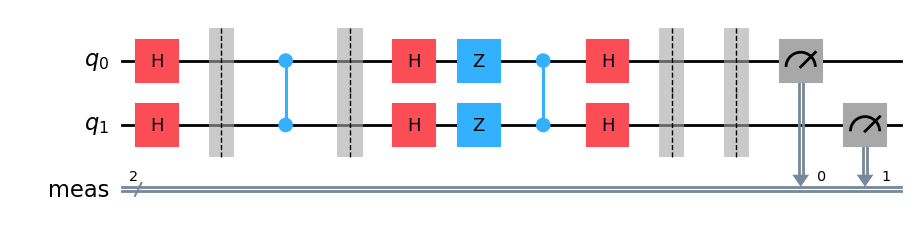

In [13]:
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

## Run the circuit on a noise-free simulator

---



```
# This is formatted as code
```

simulator

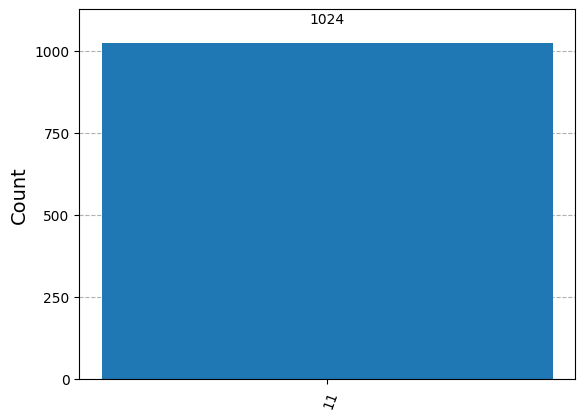

In [14]:
aer_sim = sim = AerSimulator(method='statevector') # Use a noise-free simulator
qobj = transpile(grover_circuit, aer_sim)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## Run the circuit on IBM quantum (IBM Q)

### Preparation for accessing IBM Q: store your IBM Q credential on your local computer
Step 1: Create an IBM Quantum account or log in to your existing account (visit the [IBM Quantum login page](https://quantum-computing.ibm.com/login)). <br>
Step 2: Copy your API token (or optionally regenerate one) from your [IBM Quantum account page](https://quantum-computing.ibm.com/account)
<br>
Step 3: Run the funciton IBMProvider.save_account(token='MY_API_TOKEN') below (replace API_Token with your copied API toke).
<br>
For more information: https://pypi.org/project/qiskit-ibm-provider/

In [15]:
#!pip install qiskit_ibm_provider

## Run the circuit on a simulator simulating a quantum device (QPU)
https://docs.quantum.ibm.com/guides/local-testing-mode


In [16]:
# Run our circuit on the backend.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Replace 'YOUR_API_TOKEN' with your actual IBM Quantum API token
token='MY_API_TOKEN'
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types
  overwrite=True
)

service = QiskitRuntimeService()

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
# Specify the backend to use
backend = service.backend("ibm_sherbrooke")
sim_backend = AerSimulator.from_backend(backend)

qobj = transpile(grover_circuit, sim_backend)
result = sim_backend.run(qobj, shots = 4096).result()
counts = result.get_counts()
plot_histogram(counts)

## Run the circuit on a real quantum device (QPU)

In [ ]:
# Run our circuit on the backend.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Replace 'YOUR_API_TOKEN' with your actual IBM Quantum API token
token='MY_API_TOKEN'
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types
  overwrite=True
)

service = QiskitRuntimeService()

In [ ]:
# choose the least busy QPU
real_backend = service.least_busy(simulator=False, operational=True)
print(real_backend)

In [ ]:
# Run the circuit on the QPU

qobj = transpile(grover_circuit, real_backend)

# Define Sampler: https://docs.quantum.ibm.com/guides/get-started-with-primitives
sampler = Sampler(mode=real_backend)

# Run calculation
job = sampler.run([qobj])

result = job.result()

In [ ]:
# Print and visualize the results (counts)
counts = result[0].data.meas.get_counts()
print(counts)
plot_histogram(counts) # Display the results